# Probe sa ficerima

In [1]:
from ipyfilechooser import FileChooser
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

import parselmouth
import seaborn as sns
import os


In [42]:
fc = FileChooser()
# fc.show_only_dirs = True
display(fc)

FileChooser(path='/home/zarko/PFE/prepoznavanje-emocija/lk-s-2023-prepoznavanje-emocija', filename='', title='…

In [14]:
print(fc.selected)

/Users/lenkavuckovic/Desktop/prepoznavanje emocija/baza/emodb/wav/newbaza/


0.5559998506857038


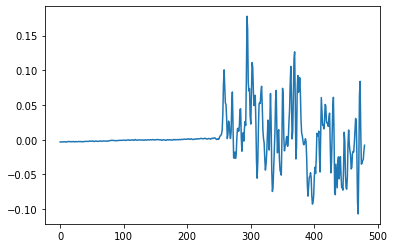

In [44]:

samplerate, data = wavfile.read(fc.selected + "newbaza/03a01Fa.wav10")
# samplerate, data = wavfile.read(fc.selected + "03a01Fa.wav")

# eksperiment za split

import librosa
data
len(data)
plt.plot(data)
energy = sum(abs(data**2))  ## ukupna energija fajla
print(energy)
# a = librosa.effects.split(data,top_db=10, frame_length=48,hop_length=24)
# print(a)

TypeError: can only concatenate str (not "NoneType") to str

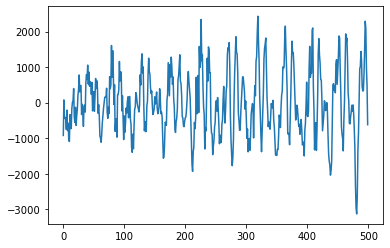

In [67]:
od = 10000
do = 10500
plt.plot(data[od:do])
plt.title("signal " + fc.selected_filename + " " + str(od) + " - " + str(do))
plt.xlabel("vreme[s]")
plt.ylabel("amplituda")
plt.show()

In [ ]:
len(data) * 1/samplerate

2.044125

---

### duzine svih fajlova iz foldera

In [5]:
fc = FileChooser()
fc.show_only_dirs = True
display(fc)

FileChooser(path='/Users/lenkavuckovic/Desktop/prepoznavanje emocija/lk-s-2023-prepoznavanje-emocija', filenam…

In [2]:
duzine1 = []
duzine2 = []

proseci1 = []
proseci2 = []

directory = os.fsencode(fc.selected)
    
lista_fajlova = os.listdir(directory)
lista_fajlova.sort()

for file in lista_fajlova:
     filename = os.fsdecode(file)
     if filename.endswith(".wav"): 

          samplerate, data = wavfile.read(fc.selected + filename)
          duzina = len(data) * 1/samplerate

          suma = 0
          for i in data:
             suma += i
          # sm = sum(data)
          avg = suma/len(data);
          # print(suma)
          #W, L, E, A, F, T, N - emocije 

          
          emocija = filename[5]


          print(filename + ": Duzina: ", duzina, " [s] , avg: ", avg)

 

NameError: name 'fc' is not defined

In [70]:
duzine1
duzine2

[5.2993125,
 8.97825,
 4.09325,
 3.756375,
 5.905,
 5.9963125,
 4.97625,
 5.4973125,
 5.3410625,
 5.975625]

In [5]:
sns.set()

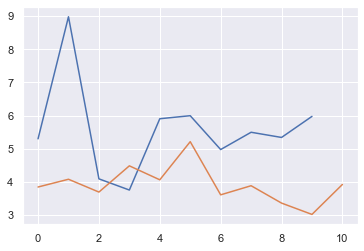

In [6]:
plt.plot(duzine1)
plt.plot(duzine2)


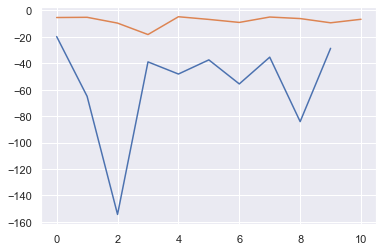

In [7]:
plt.plot(proseci1)
plt.plot(proseci2)

### koliko ima svake emocije ukupno i ostale informacije o tome
---

In [10]:
# importi
from ipyfilechooser import FileChooser
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

import parselmouth
import seaborn as sns
import os

import librosa, librosa.display
import IPython.display as ipd


from statistics import * # videcemo

from os.path import exists


In [4]:
# biranje foldera
fc = FileChooser()
fc.show_only_dirs = True
display(fc)

FileChooser(path='/home/zarko/PFE/prepoznavanje-emocija/lk-s-2023-prepoznavanje-emocija', filename='', title='…

In [29]:
fc.selected

'/Users/lenkavuckovic/Desktop/prepoznavanje emocija/baza/emodb/wav/newbaza/newbaza/'

In [5]:
# prolazenje kroz sve fajlove u folderu

directory = os.fsencode(fc.selected)
    
lista_fajlova = os.listdir(directory)
lista_fajlova.sort() # sortirano

duzine_emo = np.empty(7,dtype=object)
energija_emo = np.empty(7,dtype=object)
energija_arr_emo = np.empty(7,dtype=object)
zero_crossings_emo = np.empty(7,dtype=object)



duzine_emo[:] = [0],[0],[0],[0],[0],[0], [0]
energija_emo[:] = [0],[0],[0],[0],[0],[0], [0]
zero_crossings_emo[:] = [0],[0],[0],[0],[0],[0], [0]
energija_arr_emo[:] = [0],[0],[0],[0],[0],[0], [0]


# energija

# short term energija, frejmovano
frame_length = 480
hop_length = frame_length//2


for file in lista_fajlova:
     filename = os.fsdecode(file)
     # if filename.endswith(".wav"): 
     if True :
          # samplerate, data = wavfile.read(fc.selected + filename)
          data, samplerate = librosa.load(fc.selected + filename) 
          duzina = len(data) * 1/samplerate
            

          # print(suma)
          #      W, L, E, A, F, T, N - emocije 
          emo = ['W', 'L', 'E', 'A', 'F', 'T', 'N']
          
          emocija = filename[5]

          indx = emo.index(emocija)


          energy_arr = np.array([
               sum(abs(data[i:i+frame_length]**2))
               for i in range(0, len(data), hop_length)])
          
          energy_arr = np.empty(0)

          energy = sum(abs(data**2))  ## ukupna energija fajla
          zero_crossings = librosa.zero_crossings(data, pad=False)

          parcici = []
          for i in range(0, len(data),hop_length):
               parcici.append( data[i : i +frame_length ])

          for i in range(len(parcici)):          
               new_filename = filename + str(i)
               # ovde ubaciti if tako da se prazni delovi ne prave uopste mozda? i od parcica sklopiti nazad orig  
               # wavfile.write(fc.selected + "newbaza/" + new_filename, samplerate, parcici[i])
               # print("a")
               kratka_energija = sum(abs(parcici[i] ** 2))
               energy_arr = np.append(energy_arr, kratka_energija )

          energija_emo[indx].append(energy)
          energija_arr_emo[indx].append(energy_arr)

          duzine_emo[indx].append(duzina)
          zero_crossings_emo[indx].append(zero_crossings)
          # print(filename + ": Duzina: ", duzina, " [s]")


# uklanjanje nula
for i in range(0,7):
    duzine_emo[i].pop(0)
    energija_emo[i].pop(0)
    zero_crossings_emo[i].pop(0)
    energija_arr_emo[i].pop(0)

 

/tmp/ipykernel_2806395/2155215608.py:33: UserWarning: PySoundFile failed. Trying audioread instead.
  data, samplerate = librosa.load(fc.selected + filename)
/home/zarko/.local/lib/python3.9/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


IsADirectoryError: [Errno 21] Is a directory: '/home/zarko/PFE/prepoznavanje-emocija/lk-s-2023-prepoznavanje-emocija/baza/emodb/wav/newbaza'

In [ ]:
duzine_emo


[]

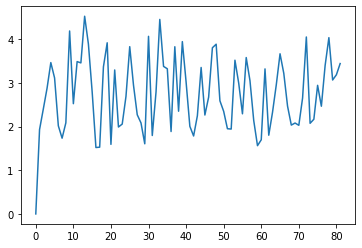

In [37]:
plt.plot(duzine_emo[1])
plt.plot()

In [ ]:
energija_emo

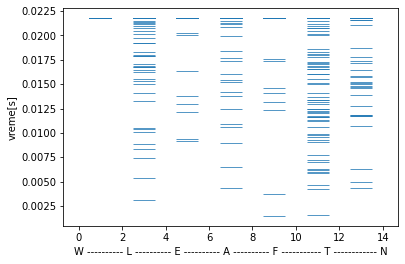

In [78]:
# fensi eventplot da vidimo sve ako bi moglo
# plt.style.use('_mpl-gallery')

# https://matplotlib.org/stable/plot_types/stats/eventplot.html#sphx-glr-plot-types-stats-eventplot-py

fig, ax = plt.subplots()

x = np.arange(1,15,2)

ax.eventplot(duzine_emo, orientation="vertical", lineoffsets=x, linewidth=0.75)

plt.ylabel("vreme[s]")
plt.xlabel("W ---------- L ---------- E ---------- A ---------- F ----------- T ------------ N")


plt.show()

### ,,,,,,,,,,W -- L -- E -- A -- F -- T -- N

In [31]:
for i in range(0,7):
    # duzine_emo[i]
    print(emo[i], " ukupno", round(sum(duzine_emo[i]),4 ), " [s] min:", round(min(duzine_emo[i]),4), " [s] max:", round(max(duzine_emo[i]),4), " [s]" )

W  ukupno 335.3809  [s] min: 1.4658  [s] max: 5.2135  [s]
L  ukupno 225.0971  [s] min: 1.5201  [s] max: 4.5258  [s]
E  ukupno 154.2304  [s] min: 1.5238  [s] max: 5.9638  [s]
A  ukupno 154.103  [s] min: 1.2255  [s] max: 4.1014  [s]
F  ukupno 180.6216  [s] min: 1.4814  [s] max: 3.9309  [s]
T  ukupno 251.2795  [s] min: 1.7357  [s] max: 8.9782  [s]
N  ukupno 186.3796  [s] min: 1.4308  [s] max: 3.8992  [s]


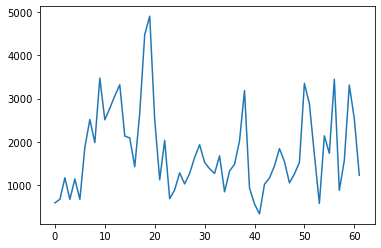

In [50]:
plt.plot(energija_emo[5])

In [79]:
energija_emo.shape
fig = plt.figure(figsize =(10, 7))
type(energija_emo[0])

list

<Figure size 720x504 with 0 Axes>

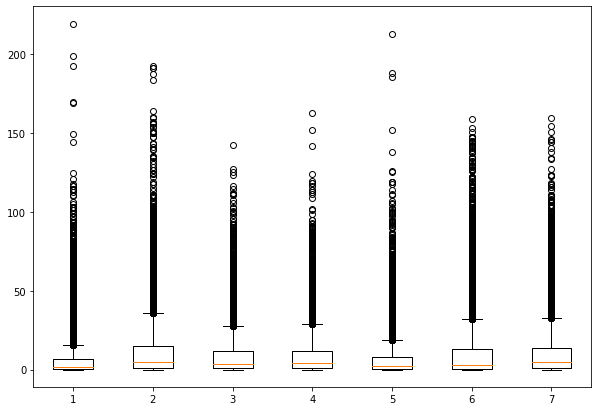

In [80]:
fig = plt.figure(figsize =(10, 7))


plt.boxplot(energija_emo)
plt.show()

### ovde je energija svih fajlova koju smo prvo boxplotovali

In [51]:
energije_ukupne_svi_fajlovi = energija_emo

---

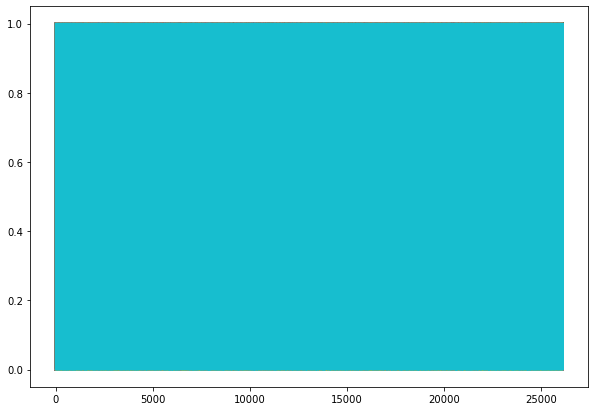

In [81]:
fig = plt.figure(figsize =(10, 7))


# plt.boxplot(zero_crossings_emo[0])
plt.plot(zero_crossings_emo[0])
plt.show()

In [82]:
sum(zero_crossings_emo)

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [ ]:
plt.boxplot(energija_arr_emo[:][0][0]) # ne valja trenutno

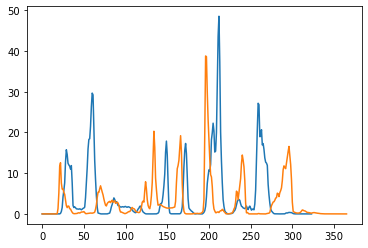

In [ ]:
# poredjenje dva rand fajla ili emocije, njihova short term energija
plt.plot(energija_arr_emo[0][0])
plt.plot(energija_arr_emo[0][1])


---

### lista meanova po emocijama

In [6]:
lista_meanova = np.empty(7,dtype=object)
lista_meanova[:] = [0],[0],[0],[0],[0],[0], [0]

lista_max = np.empty(7,dtype=object)
lista_max[:] = [0],[0],[0],[0],[0],[0], [0]

lista_min = np.empty(7,dtype=object)
lista_min[:] = [0],[0],[0],[0],[0],[0], [0]

lista_stdev = np.empty(7,dtype=object)
lista_stdev[:] = [0],[0],[0],[0],[0],[0], [0]




for i in range (len(emo)):
    for y in range(len(energija_arr_emo[i])):
        lista_meanova[i].append(mean(energija_arr_emo[i][y]))
        lista_min[i].append(min(energija_arr_emo[i][y]))
        lista_max[i].append(max(energija_arr_emo[i][y]))
        # lista_stdev[i].append(stdev(energija_arr_emo[i][y]))

for i in range(7):
    lista_meanova[i].pop(0)
    lista_max[i].pop(0)
    lista_min[i].pop(0)
    lista_stdev[i].pop(0)

TypeError: 'int' object is not iterable

In [86]:
lista_meanova[0][0]


0.01445777682856527

In [ ]:
plt.boxplot(lista_meanova)

meanovi po emocijama

In [ ]:
plt.boxplot(lista_max)

In [ ]:
plt.boxplot(lista_min)

In [ ]:
plt.boxplot(lista_stdev)

### izbacivanje tisine iz nove baze

In [7]:
# biranje foldera
fc = FileChooser()
fc.show_only_dirs = True
display(fc)

FileChooser(path='/home/zarko/PFE/prepoznavanje-emocija/lk-s-2023-prepoznavanje-emocija', filename='', title='…

In [40]:
# prolazenje kroz sve fajlove u folderu

directory = os.fsencode(fc.selected)
    
lista_fajlova = os.listdir(directory)
lista_fajlova.sort() # sortirano

# energija

# short term energija, frejmovano
frame_length = 480
hop_length = frame_length//2


for file in lista_fajlova:
    filename = os.fsdecode(file)
    #  if filename.endswith(".wav"): 
      
          # samplerate, data = wavfile.read(fc.selected + filename)
    data, samplerate = librosa.load(fc.selected + filename) 
    duzina = len(data) * 1/samplerate
    

    # print(suma)
    #      W, L, E, A, F, T, N - emocije 
    emo = ['W', 'L', 'E', 'A', 'F', 'T', 'N']
    
    emocija = filename[5]

    indx = emo.index(emocija)



    energy = sum(abs(data**2))  ## ukupna energija fajla

    if energy < 0.01:
        os.remove(fc.selected + filename) 

In [8]:
# biranje foldera
fc = FileChooser()
fc.show_only_dirs = True
display(fc)

FileChooser(path='/home/zarko/PFE/prepoznavanje-emocija/lk-s-2023-prepoznavanje-emocija', filename='', title='…

/home/zarko/PFE/prepoznavanje-emocija/lk-s-2023-prepoznavanje-emocija/baza/emodb/wav/newbaza/03a01Fa.wav


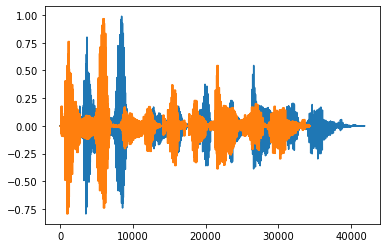

In [11]:
fproba = "03a01Fa.wav"
path=fc.selected 

fname = path + fproba
data, sr = librosa.load(fc.selected  + "../"+ fproba)
plt.plot(data)
data2 = np.empty(0,dtype=np.float32)
dt3 = np.empty(0,dtype=np.float32)
print(fname)
for i in range(200):
    if exists(fname + str(i)):

        # print()
        dt, sr = librosa.load(fname + str(i))
        dt3 = np.append(dt3, dt)

plt.plot(dt3[::2])
prvi_seg,sr = librosa.load(fname + "10")

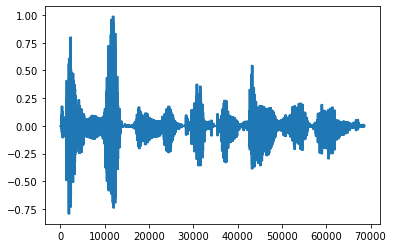

In [182]:
plt.plot(dt3)

### sastavljanje fajlova nazad

### F0 -- pitch

In [32]:
samplerate=16000
frame_len = 480 # izracunato da moze da obuhvati bar jedan citav ciklus sinusoide od 65Hz
win_len = 250
hop_len = 10

In [22]:
prvi_seg

array([-3.20050423e-03, -3.42337321e-03, -3.02501977e-03, -3.07437079e-03,
       -3.22477333e-03, -3.03603453e-03, -3.01623577e-03, -3.02381301e-03,
       -2.93570710e-03, -3.19764717e-03, -3.33185075e-03, -2.90855858e-03,
       -2.68440321e-03, -2.74532405e-03, -2.57984595e-03, -2.62426073e-03,
       -2.92241201e-03, -2.81118089e-03, -2.68017547e-03, -2.88780173e-03,
       -2.74231611e-03, -2.43409490e-03, -2.74304813e-03, -3.12968716e-03,
       -2.94482196e-03, -2.68404139e-03, -2.73925695e-03, -2.80894851e-03,
       -2.66699772e-03, -2.55705044e-03, -2.69888947e-03, -2.74215080e-03,
       -2.55083805e-03, -2.67733959e-03, -3.00114765e-03, -2.86317617e-03,
       -2.63719191e-03, -2.75127566e-03, -2.66552065e-03, -2.35211849e-03,
       -2.35901051e-03, -2.52085342e-03, -2.52765743e-03, -2.49730516e-03,
       -2.41592037e-03, -2.19972292e-03, -1.95716415e-03, -1.91402738e-03,
       -2.18637637e-03, -2.31422717e-03, -1.90933130e-03, -1.64129538e-03,
       -2.03753728e-03, -

In [23]:
data[10*240:10*240+480]


array([-3.20050423e-03, -3.42337321e-03, -3.02501977e-03, -3.07437079e-03,
       -3.22477333e-03, -3.03603453e-03, -3.01623577e-03, -3.02381301e-03,
       -2.93570710e-03, -3.19764717e-03, -3.33185075e-03, -2.90855858e-03,
       -2.68440321e-03, -2.74532405e-03, -2.57984595e-03, -2.62426073e-03,
       -2.92241201e-03, -2.81118089e-03, -2.68017547e-03, -2.88780173e-03,
       -2.74231611e-03, -2.43409490e-03, -2.74304813e-03, -3.12968716e-03,
       -2.94482196e-03, -2.68404139e-03, -2.73925695e-03, -2.80894851e-03,
       -2.66699772e-03, -2.55705044e-03, -2.69888947e-03, -2.74215080e-03,
       -2.55083805e-03, -2.67733959e-03, -3.00114765e-03, -2.86317617e-03,
       -2.63719191e-03, -2.75127566e-03, -2.66552065e-03, -2.35211849e-03,
       -2.35901051e-03, -2.52085342e-03, -2.52765743e-03, -2.49730516e-03,
       -2.41592037e-03, -2.19972292e-03, -1.95716415e-03, -1.91402738e-03,
       -2.18637637e-03, -2.31422717e-03, -1.90933130e-03, -1.64129538e-03,
       -2.03753728e-03, -

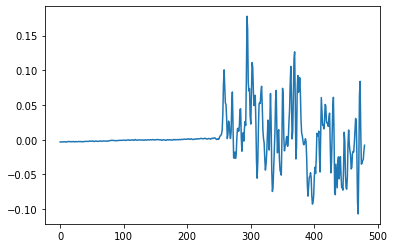

In [24]:
plt.plot(prvi_seg)

In [57]:
y = prvi_seg

f0, voiced_flag, voiced_probs = librosa.pyin(y[200:],

                                             fmin=librosa.note_to_hz('C2'),

                                             fmax=librosa.note_to_hz('C7'), sr=samplerate, frame_length=frame_len, hop_length=hop_len,win_length=win_len)
f0

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
       69.69708341, 69.69708341, 69.69708341, 69.69708341])

In [37]:


y = data


f0, voiced_flag, voiced_probs = librosa.pyin(data[0:11*240],

                                             fmin=librosa.note_to_hz('C2'),

                                             fmax=librosa.note_to_hz('C7'), sr=samplerate, frame_length=frame_len, hop_length=hop_len)
f0

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,       

In [38]:
print(f0[f0 > 1])

[129.31026969 129.31026969 129.31026969]


---
### mfcc

(20, 82)
(20, 1)


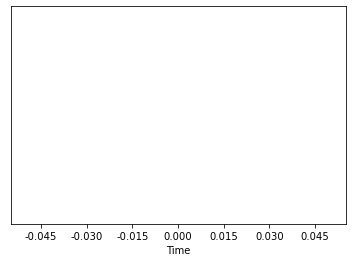

In [13]:
data # citav audio fajl u nizu
# parcici[0] # prvi segment tog audio fajla(mozda nije prvi zbog tisine zapravo) --- NE
prvi_seg # prvi segment koji nije tisina(trenutno su ostali pobrisani ovde)


mfccs = librosa.feature.mfcc (y = data, sr = samplerate)
print (mfccs.shape)
librosa.display.specshow(mfccs, sr = samplerate, x_axis = 'time')



In [ ]:
# biranje foldera
fc = FileChooser()
fc.show_only_dirs = True
display(fc)


In [59]:
# prolazenje kroz sve fajlove u folderu

directory = os.fsencode(fc.selected)
    
lista_fajlova = os.listdir(directory)
lista_fajlova.sort() # sortirano



# short term energija, frejmovano
frame_length = 480
hop_length = frame_length//2

mfccovi = np.zeros(535)
i=0

for file in lista_fajlova:
     filename = os.fsdecode(file)
     if filename.endswith(".wav"): 
     # if True :
          # samplerate, data = wavfile.read(fc.selected + filename)
          data, samplerate = librosa.load(fc.selected + filename) 
          duzina = len(data) * 1/samplerate
            
          mfccovi[i] = librosa.feature.mfcc (y = data, sr = samplerate)
          i=i+1
          # print(suma)
          #      W, L, E, A, F, T, N - emocije 
          #emo = ['W', 'L', 'E', 'A', 'F', 'T', 'N']
          
          #emocija = filename[5]

          #indx = emo.index(emocija)
          




          



 

In [ ]:
# biranje foldera
fc = FileChooser()
fc.show_only_dirs = True
display(fc)
